In [1]:
!pip install kaggle
!pip install pandas
!pip install torch


In [2]:
# 1 Pobranie zbioru
!kaggle datasets download -d joniarroba/noshowappointments

401 - Unauthorized


In [3]:
!unzip -o noshowappointments.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd
no_shows=pd.read_csv('KaggleV2-May-2016.csv')
no_shows

PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
2       2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
3       2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
4       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
...                      ...  ...                ...          ...   
110522  2016-06-07T00:00:00Z   56        MARIA ORTIZ            0   
110523  2016-06-07T00:00:00Z   51        MARIA ORTIZ            0   
110524  2016-06-07T00:00:00Z   21        MARIA ORTIZ            0   
110525  2016-06-07T00:00:00Z   38        MARIA ORTIZ            0   
110526  2016-06-07T00:00:00Z   54        MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0                  1         0           0        0             0      No  
1                  0         0           0        0             0      No  
2                  0         0           0        0             0      No  
3                  0         0           0        0             0      No  
4                  1         1           0        0             0      No  
...              ...       ...         ...      ...           ...     ...  
110522             0         0           0        0             1      No  
110523             0         0           0        0             1      No  
110524             0         0           0        0             1      No  
110525             0         0           0        0             1      No  
110526             0         0           0        0             1      No  

[110527 rows x 14 columns]

In [5]:
# 2. Podział na train/test
import torch

train_size = int(0.8 * len(no_shows))
test_size = (len(no_shows) - train_size)
no_shows_train, no_shows_test = torch.utils.data.random_split(no_shows, [train_size, test_size])

In [6]:
# 3. Statystyki
# Wielkość zbioru i podzbiorów
print(f"Wielkosc zbioru: {len(no_shows)}, podzbiór train: {train_size}, podzbiór test {test_size}.")
# Opis parametrów
no_shows.describe(include='all')

Wielkosc zbioru: 110527, podzbiór train: 88421, podzbiór test 22106.


PatientId  AppointmentID  Gender          ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                110527   
unique           NaN            NaN       2                103549   
top              NaN            NaN       F  2016-05-06T07:09:54Z   
freq             NaN            NaN   71840                    24   
mean    1.474963e+14   5.675305e+06     NaN                   NaN   
std     2.560949e+14   7.129575e+04     NaN                   NaN   
min     3.921784e+04   5.030230e+06     NaN                   NaN   
25%     4.172614e+12   5.640286e+06     NaN                   NaN   
50%     3.173184e+13   5.680573e+06     NaN                   NaN   
75%     9.439172e+13   5.725524e+06     NaN                   NaN   
max     9.999816e+14   5.790484e+06     NaN                   NaN   

              AppointmentDay            Age   Neighbourhood    Scholarship  \
count                 110527  110527.000000          110527  110527.000000   
unique                    27            NaN              81            NaN   
top     2016-06-06T00:00:00Z            NaN  JARDIM CAMBURI            NaN   
freq                    4692            NaN            7717            NaN   
mean                     NaN      37.088874             NaN       0.098266   
std                      NaN      23.110205             NaN       0.297675   
min                      NaN      -1.000000             NaN       0.000000   
25%                      NaN      18.000000             NaN       0.000000   
50%                      NaN      37.000000             NaN       0.000000   
75%                      NaN      55.000000             NaN       0.000000   
max                      NaN     115.000000             NaN       1.000000   

         Hipertension       Diabetes     Alcoholism        Handcap  \
count   110527.000000  110527.000000  110527.000000  110527.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.197246       0.071865       0.030400       0.022248   
std          0.397921       0.258265       0.171686       0.161543   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       1.000000       1.000000       4.000000   

         SMS_received No-show  
count   110527.000000  110527  
unique            NaN       2  
top               NaN      No  
freq              NaN   88208  
mean         0.321026     NaN  
std          0.466873     NaN  
min          0.000000     NaN  
25%          0.000000     NaN  
50%          0.000000     NaN  
75%          1.000000     NaN  
max          1.000000     NaN

<AxesSubplot:title={'center':'No-show'}>

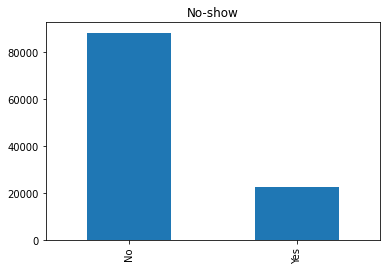

In [7]:
# Rozkład częstości dla klas
no_shows["No-show"].value_counts().plot(kind="bar", title="No-show")

In [8]:
# Wyczyszczenie zbioru
# Usunięcie negatywnego wieku
no_shows = no_shows.drop(no_shows[no_shows["Age"] < 0].index)

# Usunięcie niewiadomego wieku (zależy od zastosowania)
# no_shows = no_shows.drop(no_shows[no_shows["Age"] == 0].index)

In [9]:
# Normalizacja danych

# Usunięcie kolumn PatientId oraz AppointmentID
no_shows.drop(["PatientId", "AppointmentID"], inplace=True, axis=1)

# Zmiena wartości kolumny No-show z Yes/No na wartość boolowską
no_shows["No-show"] = no_shows["No-show"].map({'Yes': 1, 'No': 0})

# Normalizacja kolumny Age
no_shows["Age"]=(no_shows["Age"]-no_shows["Age"].min())/(no_shows["Age"].max()-no_shows["Age"].min())